Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000

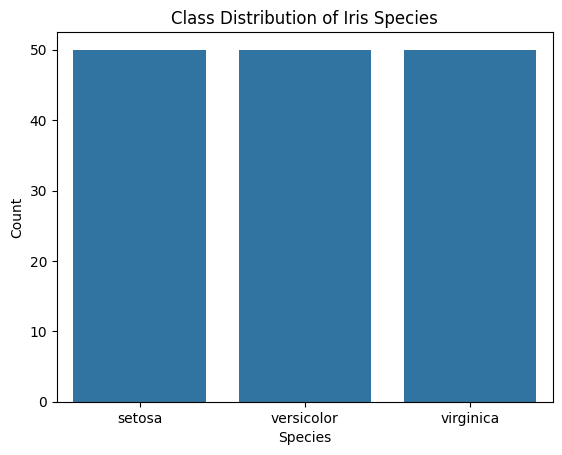

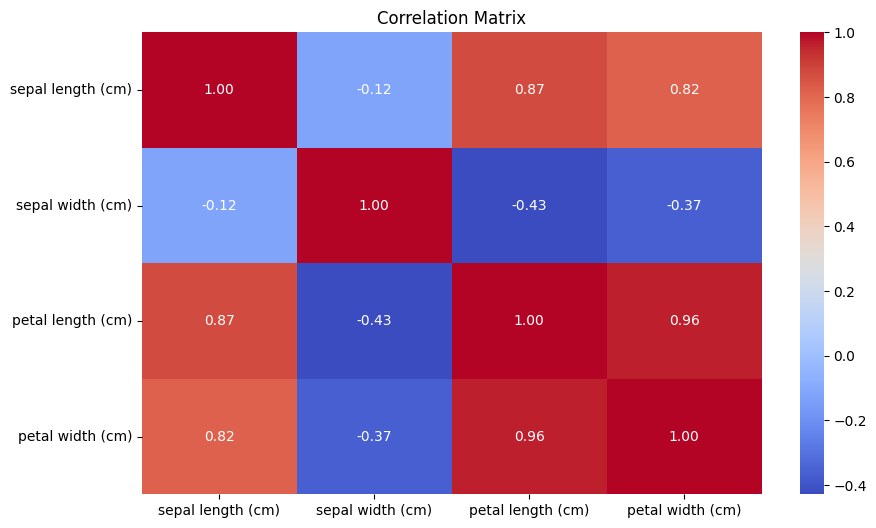

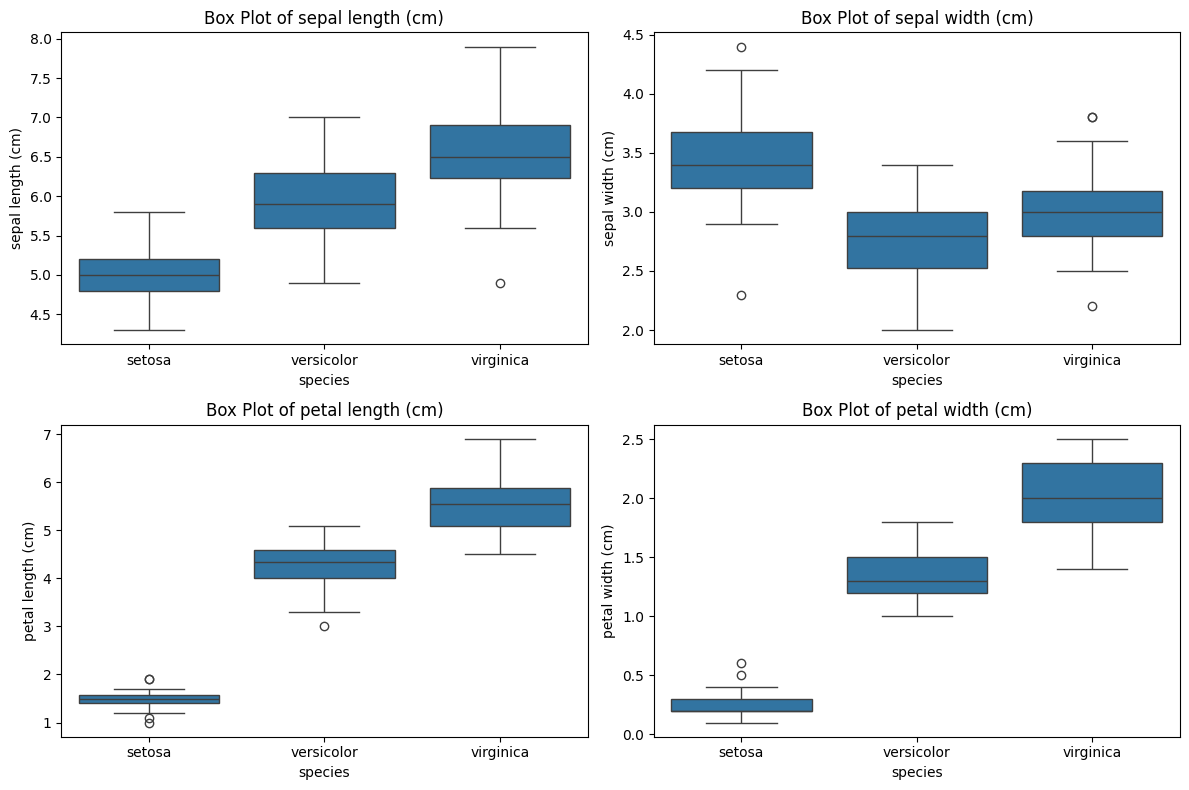

Number of outliers in the dataset: 1
Indices of outliers: [15]


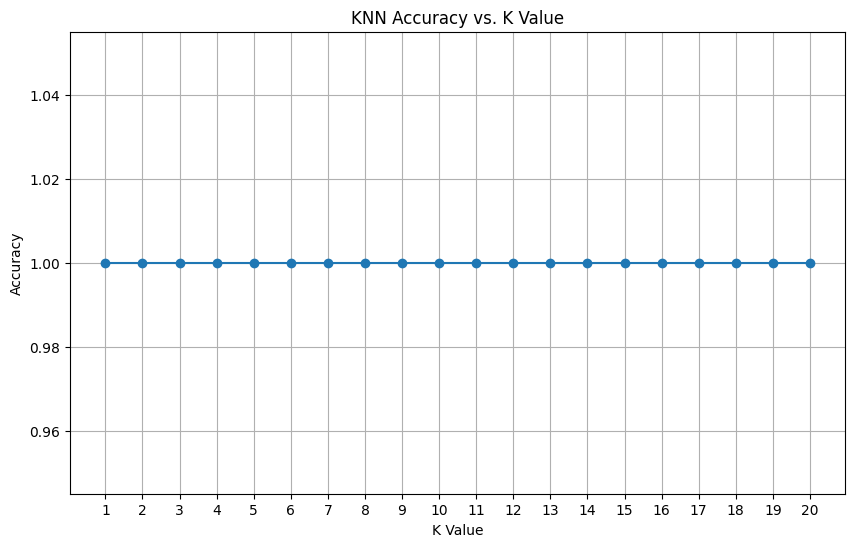

Best K: 1 with accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



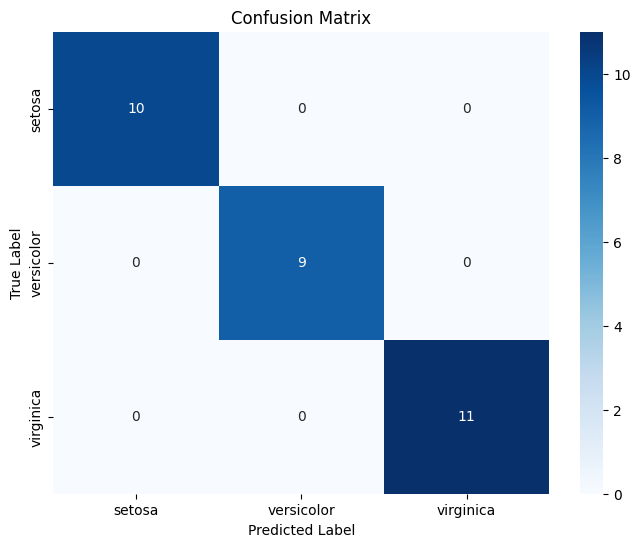

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import zscore

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Display basic statistics
print("\nDataset Statistics:")
print(data.describe())

# Display class distribution
print("\nClass Distribution:")
print(data['species'].value_counts())

# Visualize class distribution
sns.countplot(x='species', data=data)
plt.title('Class Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Explore correlations (excluding species)
plt.figure(figsize=(10, 6))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Exclude species
plt.title('Correlation Matrix')
plt.show()

# Check for outliers using box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data['species'], y=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Check for outliers using Z-scores
# Calculate Z-scores for each feature
z_scores = np.abs(zscore(data.iloc[:, :-1]))

# Set a threshold for Z-score to identify outliers
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Print outlier information
print(f'Number of outliers in the dataset: {np.sum(outliers)}')
print(f'Indices of outliers: {np.where(outliers)[0]}')

# Prepare the data
X = data.drop('species', axis=1)  # Features
y = data['species']                 # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k_values = range(1, 21)  # Test K values from 1 to 20
accuracy = []

# Train and test KNN for different values of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Choose the best K
best_k = k_values[np.argmax(accuracy)]
print(f'Best K: {best_k} with accuracy: {max(accuracy):.2f}')

# Final model with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
